In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

from utils import plotCase, loadDataSet, selectTrainingSamples, calcConfusionMatrix, calcAccuracy, plotResultDots, plotResultsOCR
from classifiers import trainMultiLayer, runMultiLayer

plt.rcParams['figure.facecolor']='white'

In [2]:
# This script will help you test your single layer neural network code
# Select which data to use:

# 1 = dot cloud 1
# 2 = dot cloud 2
# 3 = dot cloud 3
# 4 = OCR data

dataSetNr = 4; # Change this to load new data

# X - Data samples
# D - Desired output from classifier for each sample
# L - Labels for each sample
X, D, L = loadDataSet(dataSetNr)

In [33]:
# Select a subset of the training samples
numBins = 6                        # Number of bins you want to divide your data into
numSamplesPerLabelPerBin = np.inf  # Number of samples per label per bin, set to inf for max number (total number is numLabels*numSamplesPerBin)
selectAtRandom = True              # true = select samples at random, false = select the first features

# Split data into bins based on the settings above.
# The outputs are lists of length numBins, where each item is a data array. Try printing for example XBins[0].shape.
XBins, DBins, LBins = selectTrainingSamples(X, D, L, numSamplesPerLabelPerBin, numBins, selectAtRandom)

# To extract a single bin from them use e.g.:
# XBin0 = XBins[0]
# Or to combine several bins into one matrix (good for cross validataion), use the numpy function concatenate:
# XBinComb = np.concatenate(XBins[0:4])
# This example combines 4 bins, nr 0 to 3.

# Add your own code to setup data for training and test here
XTrain = np.concatenate(XBins[0:3])
LTrain = np.concatenate(LBins[0:3])
XTest  = np.concatenate(XBins[3:6])
LTest  = np.concatenate(LBins[3:6])
DTrain = np.concatenate(DBins[0:3])
DTest  = np.concatenate(DBins[3:6])

In [34]:
# Modify the X Matrices so that a bias is added
# Note that the bias must be the last feature for the plot code to work

# The training data
m = XTrain.shape[0]
bias =np.ones(shape=(1, m))
XTrain = np.concatenate((XTrain,bias.T),axis = 1)

# The test data
m = XTest.shape[0]
bias =np.ones(shape=(1, m))
XTest = np.concatenate((XTest,bias.T),axis = 1)

In [28]:
# Train your multi layer network
# Note: You need to modify trainMultiLayer() and runMultiLayer() in classifiers.py in order to train the network
if dataSetNr == 1:
    numHidden = 3         # Change this, number of hidden neurons
    numIterations = 500   # overfitting after 175 iter 
    learningRate  = 0.01  # Change this, your learning rate
if dataSetNr == 2:
    numHidden = 3         # Change this, number of hidden neurons
    numIterations = 1500    # Change this, number of iterations (epochs)
    learningRate  = 0.05
if dataSetNr == 3:
    numHidden = 5         # Change this, number of hidden neurons
    numIterations = 6001    # Change this, number of iterations (epochs)
    learningRate  = 0.04 
if dataSetNr == 4:
    numHidden = 20         # Change this, number of hidden neurons
    numIterations = 6100    # Change this, number of iterations (epochs)
    learningRate  = 0.065
W0 = np.random.rand(XTrain.shape[1],numHidden)                # Initialize your weight matrix W
V0 = np.random.rand(numHidden+1,DTest.shape[1])                # Initialize your weight matrix V
if dataSetNr ==4:
    W0 = np.random.rand(XTrain.shape[1],numHidden)-0.5                # Initialize your weight matrix W
    V0 = np.random.rand(numHidden+1,DTest.shape[1])-0.5  
# Run training loop
W, V, ErrTrain, ErrTest = trainMultiLayer(XTrain, DTrain, XTest, DTest ,W0, V0, numIterations, learningRate)

n : 0
n : 1000
n : 2000
n : 3000
n : 4000
n : 5000
n : 6000


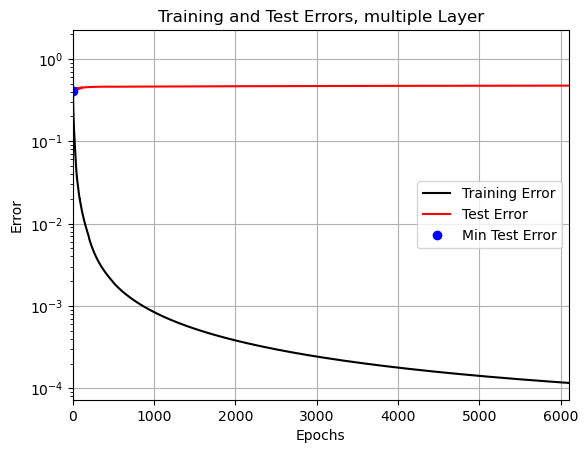

In [29]:
# Plot errors
# Note: You should not have to modify this code

# [minErrTest, minErrTestInd] = min(ErrTest);
minErrTest = ErrTest.min()
minErrTestInd = ErrTest.argmin()

plt.figure()

plt.semilogy(ErrTrain, 'k', linewidth=1.5, label='Training Error')
plt.semilogy(ErrTest, 'r', linewidth=1.5, label='Test Error')
plt.semilogy(minErrTestInd, minErrTest, 'bo', linewidth=1.5, label='Min Test Error')

plt.xlim([0,numIterations])
plt.grid('on')
plt.title('Training and Test Errors, multiple Layer')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

In [32]:
# Calculate the Confusion Matrix and the Accuracy of the data
# Note: you have to modify the calcConfusionMatrix() and calcAccuracy() functions in utils.py yourself.

_, LPredTrain, _ = runMultiLayer(XTrain, W, V)
_, LPredTest , _ = runMultiLayer(XTest , W, V)
# The confusion matrix
cM = calcConfusionMatrix(LPredTest, LTest)
cM2 = calcConfusionMatrix(LPredTrain, LTrain)
# The accuracy
acc = calcAccuracy(cM)
acc2 = calcAccuracy(cM2)
# Print the results
print("Confusion matrix:")
print(cM)
print(f'Accuracy: {acc:.4f}')
print("Confusion matrix:")
print(cM2)
print(f'Accuracy: {acc2:.4f}')

Confusion matrix:
[[248.   8.   2.  23.  12.   1.   0.   0. 105.   0.]
 [  5. 160.  20.  29.   5.   0.   6.   9. 143.  22.]
 [ 23.  70.  21. 193.   1.   1.  56.   9.  22.   3.]
 [ 11.  24.   0. 297.  16.   2.  13.  27.   5.   4.]
 [  3.  87.  64.  13.  10.   0.   1.   0. 209.  12.]
 [  2.  64.   1. 263.   8.  10.  20.   6.  21.   4.]
 [ 69.  97.   5.  11.   2.   0. 174.   0.  41.   0.]
 [  5.  63.  91.   6.  74.  26.   0. 127.   2.   5.]
 [ 37.  75.  17. 101.  18.   0.  33.   3. 110.   5.]
 [ 17.  10.   6. 251.  19.   0.   1.   7.  31.  57.]]
Accuracy: 0.3043
Confusion matrix:
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Accuracy: 1.0000


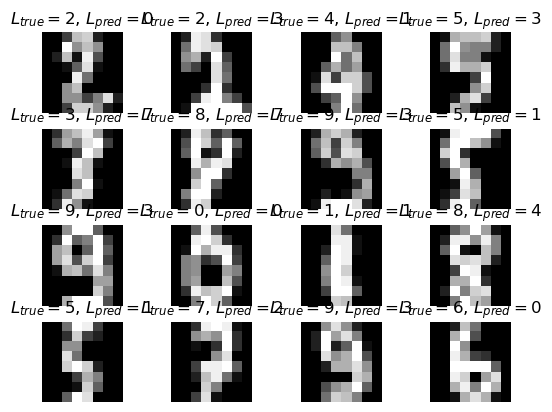

In [31]:
# Plot classifications
# Note: You should not have to modify this code

if dataSetNr < 4:
    plotResultDots(XTrain, LTrain, np.array(LPredTrain)[:,0], XTest, LTest, np.array(LPredTest)[:,0], 'multi', [W, V], [])
else:
    plotResultsOCR(XTest, LTest, np.array(LPredTest)[:,0])